In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

import graphviz
from sklearn import tree

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **1. Loading Dataset**

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/India_Delhi.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2399, 12)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
1,2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2,2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
3,2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
4,2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2023-10-01


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2399 non-null   object 
 1   co            2399 non-null   float64
 2   no2           2399 non-null   float64
 3   o3            2399 non-null   float64
 4   pm10          2398 non-null   float64
 5   pm25          2398 non-null   float64
 6   so2           2399 non-null   float64
 7   humidity      1698 non-null   float64
 8   pressure      1698 non-null   float64
 9   temperature   1698 non-null   float64
 10  wind-speed    1629 non-null   float64
 11  Country_City  2399 non-null   object 
dtypes: float64(10), object(2)
memory usage: 225.0+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,2399.000000,2399.000000,2399.000000,2398.000000,2398.000000,2399.000000,1698.000000,1698.000000,1698.000000,1629.000000
mean,9.325594,16.870946,9.480700,131.572143,164.397832,5.702751,60.708304,985.184923,26.338869,1.101964
std,3.715709,7.805715,4.829603,77.174642,64.829240,2.289821,17.138084,10.022854,6.631277,0.493156
min,0.100000,5.000000,2.400000,12.000000,30.000000,1.700000,13.000000,743.000000,6.200000,0.300000
25%,7.050000,10.600000,6.000000,82.000000,123.000000,4.000000,48.500000,979.800000,22.100000,0.800000
50%,8.400000,15.800000,8.200000,120.000000,160.000000,5.300000,63.000000,983.900000,28.600000,1.000000
75%,10.700000,21.500000,11.800000,160.000000,189.000000,7.100000,74.000000,990.400000,31.100000,1.300000
max,30.600000,66.500000,40.300000,999.000000,577.000000,19.800000,99.100000,1020.500000,38.000000,4.600000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2397
The number of values for feature co :200
The number of values for feature no2 :328
The number of values for feature o3 :226
The number of values for feature pm10 :320
The number of values for feature pm25 :309
The number of values for feature so2 :116
The number of values for feature humidity :602
The number of values for feature pressure :300
The number of values for feature temperature :264
The number of values for feature wind-speed :33
The number of values for feature Country_City :1 -- ['India_Delhi']


In [7]:
new_data.isna().sum()

Date              0
co                0
no2               0
o3                0
pm10              1
pm25              1
so2               0
humidity        701
pressure        701
temperature     701
wind-speed      770
Country_City      0
dtype: int64

# **1.2 - Function**

In [8]:
print(os.listdir('/kaggle/usr/lib/function'))

['__results__.html', '__notebook__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [9]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [11]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [12]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
               '2015-07-14', '2015-07-15',
               ...
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27'],
              dtype='datetime64[ns]', length=802, freq=None)


In [13]:
new_data3 = fn.impute_missing_dates(new_data2)

In [14]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


# **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [16]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [17]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0


In [18]:
new_data4.shape

(3199, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [19]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [20]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


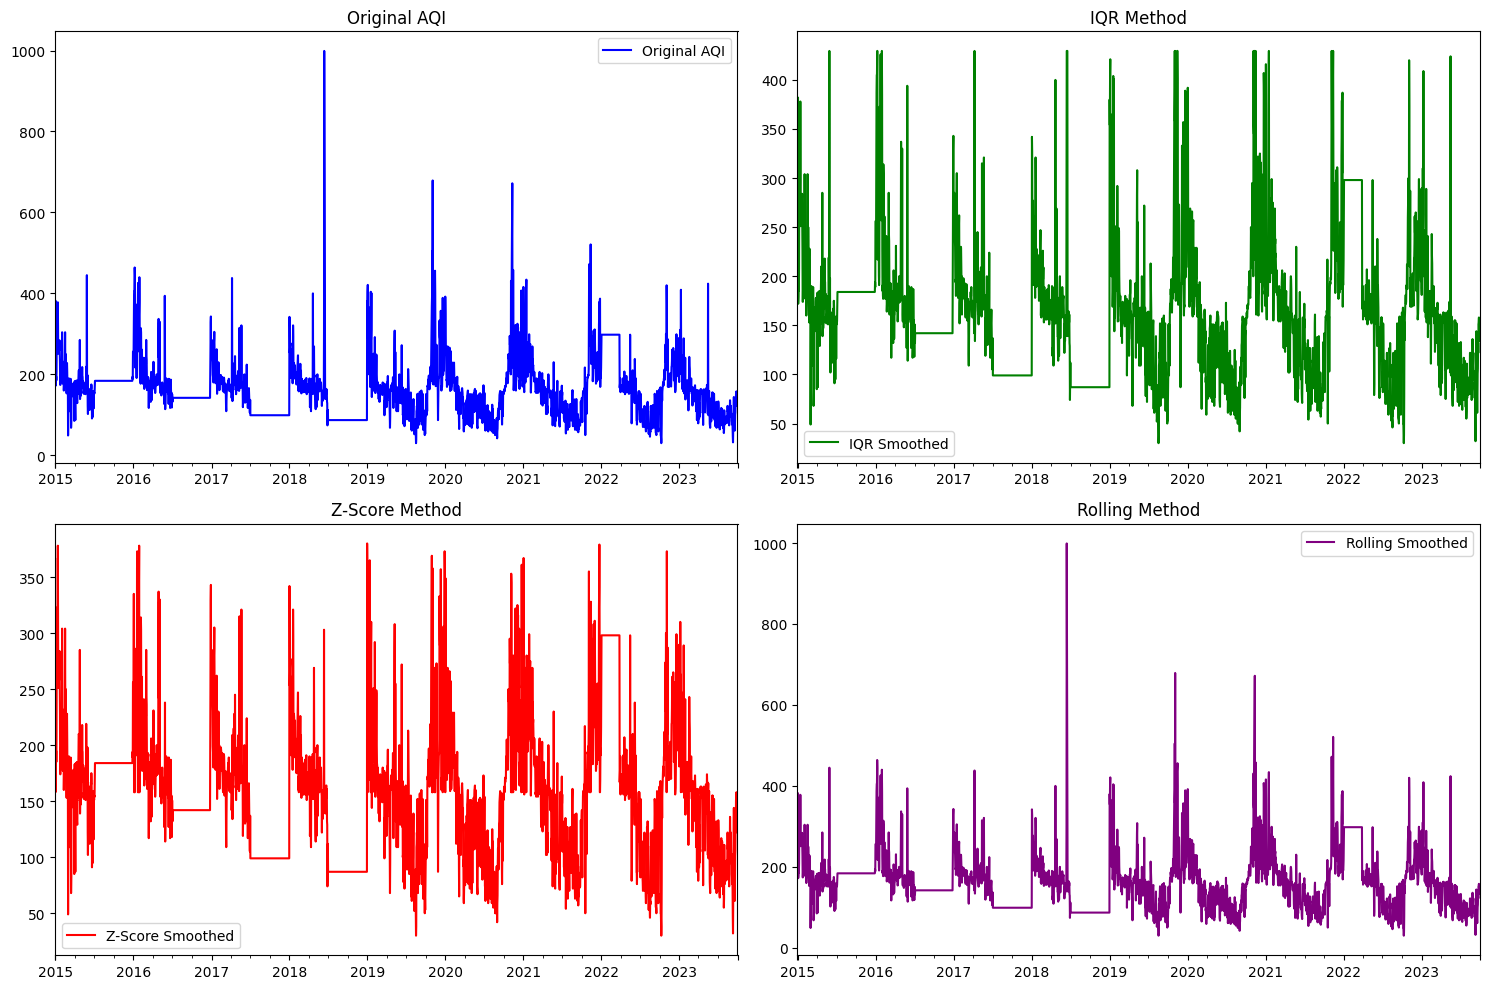

In [21]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot original AQI
new_data4['AQI'].plot(
    ax=axes[0, 0], 
    title='Original AQI', 
    color='blue', 
    label='Original AQI'
)
axes[0, 0].legend()

# Plot IQR Method smoothed AQI
new_data4['AQI_smoothed_iqr'].plot(
    ax=axes[0, 1], 
    title='IQR Method', 
    color='green', 
    label='IQR Smoothed'
)
axes[0, 1].legend()

# Plot Z-Score Method smoothed AQI
new_data4['AQI_smoothed_zscore'].plot(
    ax=axes[1, 0], 
    title='Z-Score Method', 
    color='red', 
    label='Z-Score Smoothed'
)
axes[1, 0].legend()

# Plot Rolling Method smoothed AQI
new_data4['AQI_smoothed_rolling'].plot(
    ax=axes[1, 1], 
    title='Rolling Method', 
    color='purple', 
    label='Rolling Smoothed'
)
axes[1, 1].legend()


plt.tight_layout()
plt.show()

(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [22]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,177.000000


# **2.1. Splitting & Preprocessing the Raw Data(Normal AQI)**

Normal AQI

In [23]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [24]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with Normal AQI***

In [25]:
data = new_data4.drop(['Country_City', 'Checks',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 
                       'AQI_smoothed_rolling'],axis=1)

In [26]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [27]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI'],
      dtype='object')
Index([], dtype='object')


In [28]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [29]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **2.2. Model Training & Testing**

## **2.2.1. LinearRegression**

In [30]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [31]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.9675634154803487
The r2 Accuracy on the test dataset prediction is:  0.968703504370825

The RMSE  on the training dataset is:  13.335721085516212
The RMSE  on the testing dataset is:  11.92843805334961

The MAE  on the training dataset is:  8.782664440343714
The MAE  on the testing dataset is:  8.726879777108639

The MSE  on the training dataset is:  177.84145687068172
The MSE  on the testing dataset is:  142.28763439259905


## **2.2.2.  KNeighborsRegressor**

In [32]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [33]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9979263509401755
The R2 score on the test dataset prediction is:  0.9958587960992547

The RMSE  on the training dataset is:  3.3718370181408592
The RMSE  on the testing dataset is:  4.3390937273813295

The MAE  on the training dataset is:  1.262211801484955
The MAE  on the testing dataset is:  1.94296875

The MSE  on the training dataset is:  11.369284876905041
The MSE  on the testing dataset is:  18.827734375


## **2.2.3.  Random Forest Regressor**

In [34]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [35]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9983074256645295
The R2 score on the test dataset prediction is:  0.9956560285487288

The RMSE  on the training dataset is:  3.0463010517173785
The RMSE  on the testing dataset is:  4.444052749883826

The MAE  on the training dataset is:  0.32080890973036347
The MAE  on the testing dataset is:  0.6877968750000001

The MSE  on the training dataset is:  9.279950097694407
The MSE  on the testing dataset is:  19.74960484375


## **2.2.4.  Decision Tree regressor**

In [36]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [37]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9871059824520706

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  7.656492343103335

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.925

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  58.621875


## **2.2.5.  Support Vector Machine regressor**

In [38]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [39]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.9170000514491703
The R2 score on the test dataset prediction is:  0.9516113768245813

The RMSE on the training dataset is:  21.33230853202443
The RMSE on the testing dataset is:  14.832260917216331

The MAE on the training dataset is:  6.2053963500967235
The MAE on the testing dataset is:  5.468297838577041

The MSE  on the training dataset is:  455.0673873054823
The MSE  on the testing dataset is:  219.99596391638306


## **2.2.6.  XGBoost Regressor**

In [40]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [41]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999884261680223
The R2 score on the test dataset prediction is:  0.9884092057630378

The RMSE on the training dataset is:  0.25190543128934345
The RMSE on the testing dataset is:  7.259259509512052

The MAE on the training dataset is:  0.15732481443309002
The MAE on the testing dataset is:  1.3124947667121887

The MSE  on the training dataset is:  0.06345634631307014
The MSE  on the testing dataset is:  52.69684862644117


## **2.2.7.  Neural Network Regressor**

In [42]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [43]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9673678894623599
The R2 score on the test dataset prediction is:  0.9688559173459592

The RMSE on the training dataset is:  13.37585420741577
The RMSE on the testing dataset is:  11.899357040245183

The MAE on the training dataset is:  8.659891885773265
The MAE on the testing dataset is:  8.589989262303709

The MSE  on the training dataset is:  178.91347577804214
The MSE  on the testing dataset is:  141.59469797123262


# **3.1. Splitting & Preprocessing the Raw Data(Smoothed iqr)**

AQI Smoothed iqr

In [44]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [45]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [46]:
data = new_data4.drop(['Country_City', 'Checks', 'AQI', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],axis=1)

In [47]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_iqr
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [48]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_iqr'],
      dtype='object')
Index([], dtype='object')


In [49]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_iqr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [50]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **3.2. Model Training & Testing**

## **3.2.1. LinearRegression**

In [51]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [52]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.971575605824904
The r2 Accuracy on the test dataset prediction is:  0.9804921207674033

The RMSE  on the training dataset is:  11.680317163751663
The RMSE  on the testing dataset is:  9.29304796536017

The MAE  on the training dataset is:  5.8047920907054795
The MAE  on the testing dataset is:  5.575487911928217

The MSE  on the training dataset is:  136.42980904583172
The MSE  on the testing dataset is:  86.36074048648479


## **3.2.2.  KNeighborsRegressor**

In [53]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [54]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9992182147080905
The R2 score on the test dataset prediction is:  0.9979916017028466

The RMSE  on the training dataset is:  1.9371032727988668
The RMSE  on the testing dataset is:  2.981796988604355

The MAE  on the training dataset is:  1.1364790933958577
The MAE  on the testing dataset is:  1.812109375

The MSE  on the training dataset is:  3.7523690894880812
The MSE  on the testing dataset is:  8.89111328125


## **3.2.3.  Random Forest Regressor**

In [55]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [56]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9993952495302396
The R2 score on the test dataset prediction is:  0.9983931532765629

The RMSE  on the training dataset is:  1.7037157343976814
The RMSE  on the testing dataset is:  2.667106607589955

The MAE  on the training dataset is:  0.2412973817897616
The MAE  on the testing dataset is:  0.5451406249999998

The MSE  on the training dataset is:  2.9026473036342306
The MSE  on the testing dataset is:  7.1134576562500005


## **3.2.4.  Decision Tree regressor**

In [57]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [58]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9986975246410333

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  2.40125292816063

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.54609375

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  5.766015625


## **3.2.5.  Support Vector Machine regressor**

In [59]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [60]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.9522313571226982
The R2 score on the test dataset prediction is:  0.9617482996929472

The RMSE on the training dataset is:  15.141903657316124
The RMSE on the testing dataset is:  13.0130327213856

The MAE on the training dataset is:  5.525088335191747
The MAE on the testing dataset is:  5.017323928082908

The MSE  on the training dataset is:  229.27724636744344
The MSE  on the testing dataset is:  169.3390206078523


## **3.2.6.  XGBoost Regressor**

In [61]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [62]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999917243791947
The R2 score on the test dataset prediction is:  0.9973126151042563

The RMSE on the training dataset is:  0.19930092688666182
The RMSE on the testing dataset is:  3.4491976816390433

The MAE on the training dataset is:  0.12236696670371232
The MAE on the testing dataset is:  0.9527172446250916

The MSE  on the training dataset is:  0.039720859457882514
The MSE  on the testing dataset is:  11.896964647024152


## **3.2.7.  Neural Network Regressor**

In [63]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [64]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.971104674972995
The R2 score on the test dataset prediction is:  0.9795978695987976

The RMSE on the training dataset is:  11.776678499114064
The RMSE on the testing dataset is:  9.503660401750928

The MAE on the training dataset is:  5.858561943487816
The MAE on the testing dataset is:  5.643036826403818

The MSE  on the training dataset is:  138.6901564714955
The MSE  on the testing dataset is:  90.3195610318086


# **4.1. Splitting & Preprocessing the Raw Data(zscore)**

AQI smoothed zscore

In [65]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [66]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [67]:
data = new_data4.drop(['Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_rolling'],axis=1)

In [68]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_zscore
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,158.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [69]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_zscore'],
      dtype='object')
Index([], dtype='object')


In [70]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_zscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [71]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **4.2. Model Training & Testing**

## **4.2.1. LinearRegression**

In [72]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [73]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.820101251986455
The r2 Accuracy on the test dataset prediction is:  0.8109701883481274

The RMSE  on the training dataset is:  25.918017419593703
The RMSE  on the testing dataset is:  25.59058230607185

The MAE  on the training dataset is:  11.834615790056304
The MAE  on the testing dataset is:  11.513399614030684

The MSE  on the training dataset is:  671.7436269623627
The MSE  on the testing dataset is:  654.8779027638376


## **4.2.2.  KNeighborsRegressor**

In [74]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [75]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.993585831293998
The R2 score on the test dataset prediction is:  0.9975461457600426

The RMSE  on the training dataset is:  4.893931612475689
The RMSE  on the testing dataset is:  2.9156769154006072

The MAE  on the training dataset is:  1.2985541227041812
The MAE  on the testing dataset is:  1.75390625

The MSE  on the training dataset is:  23.950566627588902
The MSE  on the testing dataset is:  8.501171875


## **4.2.3.  Random Forest Regressor**

In [76]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [77]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9991076630201373
The R2 score on the test dataset prediction is:  0.9803591301626526

The RMSE  on the training dataset is:  1.8253752284124378
The RMSE  on the testing dataset is:  8.248887415509438

The MAE  on the training dataset is:  0.3217311449785072
The MAE  on the testing dataset is:  0.8948281249999998

The MSE  on the training dataset is:  3.3319947245017594
The MSE  on the testing dataset is:  68.04414359374998


## **4.2.4.  Decision Tree regressor**

In [78]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [79]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9708442021151412

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  10.050264300007239

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.8984375

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  101.0078125


## **4.2.5.  Support Vector Machine regressor**

In [80]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [81]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.7677107064672399
The R2 score on the test dataset prediction is:  0.7356326067742582

The RMSE on the training dataset is:  29.451153110814364
The RMSE on the testing dataset is:  30.263486667788925

The MAE on the training dataset is:  7.778414713615426
The MAE on the testing dataset is:  8.000240231724629

The MSE  on the training dataset is:  867.3704195566306
The MSE  on the testing dataset is:  915.8786252914381


## **4.2.6.  XGBoost Regressor**

In [82]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [83]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999929342008133
The R2 score on the test dataset prediction is:  0.9682686702850274

The RMSE on the training dataset is:  0.1624307883604559
The RMSE on the testing dataset is:  10.484775923423772

The MAE on the training dataset is:  0.09519905576299717
The MAE on the testing dataset is:  1.5003108382225037

The MSE  on the training dataset is:  0.026383761007399222
The MSE  on the testing dataset is:  109.93052616440681


## **4.2.7.  Neural Network Regressor**

In [84]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [85]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9384594496010764
The R2 score on the test dataset prediction is:  0.9324902882630374

The RMSE on the training dataset is:  15.1589246774321
The RMSE on the testing dataset is:  15.29319211506848

The MAE on the training dataset is:  5.765171922023668
The MAE on the testing dataset is:  5.558166931540594

The MSE  on the training dataset is:  229.79299737605993
The MSE  on the testing dataset is:  233.88172506839274


# **5.1. Splitting & Preprocessing the Raw Data(AQI_smoothed_rolling)**

AQI_smoothed_rolling

In [86]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [87]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [88]:
data = new_data4.drop([ 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore'],axis=1)

In [89]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [90]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_rolling'],
      dtype='object')
Index([], dtype='object')


In [91]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_rolling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [92]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **5.2. Model Training & Testing**

## **5.2.1. LinearRegression**

In [93]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [94]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.9675634154803487
The r2 Accuracy on the test dataset prediction is:  0.968703504370825

The RMSE  on the training dataset is:  13.335721085516212
The RMSE  on the testing dataset is:  11.92843805334961

The MAE  on the training dataset is:  8.782664440343714
The MAE  on the testing dataset is:  8.726879777108639

The MSE  on the training dataset is:  177.84145687068172
The MSE  on the testing dataset is:  142.28763439259905


## **5.2.2.  KNeighborsRegressor**

In [95]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [96]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9979263509401755
The R2 score on the test dataset prediction is:  0.9958587960992547

The RMSE  on the training dataset is:  3.3718370181408592
The RMSE  on the testing dataset is:  4.3390937273813295

The MAE  on the training dataset is:  1.262211801484955
The MAE  on the testing dataset is:  1.94296875

The MSE  on the training dataset is:  11.369284876905041
The MSE  on the testing dataset is:  18.827734375


## **5.2.3.  Random Forest Regressor**

In [97]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [98]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9985534822005928
The R2 score on the test dataset prediction is:  0.9955782854037283

The RMSE  on the training dataset is:  2.816182761441135
The RMSE  on the testing dataset is:  4.483643537905305

The MAE  on the training dataset is:  0.32112543962485335
The MAE  on the testing dataset is:  0.7035312499999999

The MSE  on the training dataset is:  7.930885345838216
The MSE  on the testing dataset is:  20.103059374999997


## **5.2.4.  Decision Tree regressor**

In [99]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [100]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9920676256990308

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  6.005336168775234

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.9453125

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  36.0640625


## **5.2.5.  Support Vector Machine regressor**

In [101]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [102]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.9170000514491703
The R2 score on the test dataset prediction is:  0.9516113768245813

The RMSE on the training dataset is:  21.33230853202443
The RMSE on the testing dataset is:  14.832260917216331

The MAE on the training dataset is:  6.2053963500967235
The MAE on the testing dataset is:  5.468297838577041

The MSE  on the training dataset is:  455.0673873054823
The MSE  on the testing dataset is:  219.99596391638306


## **5.2.6.  XGBoost Regressor**

In [103]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [104]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999884261680223
The R2 score on the test dataset prediction is:  0.9884092057630378

The RMSE on the training dataset is:  0.25190543128934345
The RMSE on the testing dataset is:  7.259259509512052

The MAE on the training dataset is:  0.15732481443309002
The MAE on the testing dataset is:  1.3124947667121887

The MSE  on the training dataset is:  0.06345634631307014
The MSE  on the testing dataset is:  52.69684862644117


## **5.2.7.  Neural Network Regressor**

In [105]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [106]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9999912284384933
The R2 score on the test dataset prediction is:  0.9999864245160907

The RMSE on the training dataset is:  0.21929937868375948
The RMSE on the testing dataset is:  0.2484353453332898

The MAE on the training dataset is:  0.14164181370403087
The MAE on the testing dataset is:  0.1441886468845711

The MSE  on the training dataset is:  0.04809221749108294
The MSE  on the testing dataset is:  0.06172012081087096


# **6.1. Splitting & Preprocessing the Raw Data**

(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [107]:
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,177.000000


In [108]:
new_smooth.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'AQI_Smooth'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [109]:
data = new_smooth.drop(['Country_City'],axis=1)

In [110]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,177.000000


In [111]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_Smooth'],
      dtype='object')
Index([], dtype='object')


In [112]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_Smooth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [113]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **6.2. Model Training & Testing**

## **6.2.1. LinearRegression**

In [114]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [115]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.9957518243926221
The r2 Accuracy on the test dataset prediction is:  0.9967443701733852

The RMSE  on the training dataset is:  3.5597835382758585
The RMSE  on the testing dataset is:  2.9803907275276664

The MAE  on the training dataset is:  1.402780233956917
The MAE  on the testing dataset is:  1.3042642877255295

The MSE  on the training dataset is:  12.67205883937979
The MSE  on the testing dataset is:  8.882728888732894


## **6.2.2.  KNeighborsRegressor**

In [116]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [117]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.999370152400974
The R2 score on the test dataset prediction is:  0.9979164803148369

The RMSE  on the training dataset is:  1.3706926974229983
The RMSE  on the testing dataset is:  2.3842648611081327

The MAE  on the training dataset is:  0.8875347720344118
The MAE  on the testing dataset is:  1.4460839137277408

The MSE  on the training dataset is:  1.878798470768735
The MSE  on the testing dataset is:  5.684718927914984


## **6.2.3.  Random Forest Regressor**

In [118]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [119]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9999276339458097
The R2 score on the test dataset prediction is:  0.9990428126839805

The RMSE  on the training dataset is:  0.46461134087877654
The RMSE  on the testing dataset is:  1.6160476489955142

The MAE  on the training dataset is:  0.09703708043865322
The MAE  on the testing dataset is:  0.3057595612913902

The MSE  on the training dataset is:  0.21586369807317468
The MSE  on the testing dataset is:  2.611610003823929


## **6.2.4.  Decision Tree regressor**

In [120]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [121]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9992224255420781

The RMSE  on the training dataset is:  1.5891322657901308e-15
The RMSE  on the testing dataset is:  1.4565543259065339

The MAE  on the training dataset is:  8.885254999735525e-17
The MAE  on the testing dataset is:  0.2914722236713974

The MSE  on the training dataset is:  2.525341358175275e-30
The MSE  on the testing dataset is:  2.1215505043170375


## **6.2.5.  Support Vector Machine regressor**

In [122]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [123]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.9823863776979571
The R2 score on the test dataset prediction is:  0.9806482477102334

The RMSE on the training dataset is:  7.2484759048667
The RMSE on the testing dataset is:  7.266342129155743

The MAE on the training dataset is:  4.925408783670605
The MAE on the testing dataset is:  5.129733510896875

The MSE  on the training dataset is:  52.54040294343312
The MSE  on the testing dataset is:  52.799727937943615


## **6.2.6.  XGBoost Regressor**

In [124]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [125]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999948866321279
The R2 score on the test dataset prediction is:  0.9993201126072465

The RMSE on the training dataset is:  0.12350253703384058
The RMSE on the testing dataset is:  1.3619908447692324

The MAE on the training dataset is:  0.08059062257039981
The MAE on the testing dataset is:  0.5011409600575767

The MSE  on the training dataset is:  0.015252876653795162
The MSE  on the testing dataset is:  1.855019061235207


## **6.2.7.  Neural Network Regressor**

In [126]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [127]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9956898187329164
The R2 score on the test dataset prediction is:  0.9966423213366961

The RMSE on the training dataset is:  3.585668429729277
The RMSE on the testing dataset is:  3.0267409999808224

The MAE on the training dataset is:  1.4867516859978434
The MAE on the testing dataset is:  1.4028677409753132

The MSE  on the training dataset is:  12.857018087957218
The MSE  on the testing dataset is:  9.16116108096491


# **7. Hyper Parameter Tuning**

Lowest Error is using AQI_Rolling

In [128]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [129]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [130]:
data = new_data4.drop([ 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore'],axis=1)

In [131]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [132]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_rolling'],
      dtype='object')
Index([], dtype='object')


In [133]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_rolling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [134]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [135]:
xgb_ = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=5,
    cv=5,
    verbose=True
)

In [136]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='neg_mean_squared_error', verbose=True)

In [137]:
best_model = grid_search.best_estimator_
print(best_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=180, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [138]:
y_pred = best_model.predict(X_test)

In [139]:
r2_score_test = best_model.score(X_test, y_test)

# Print the R² score
print(f"The R² score on the test dataset is: {r2_score_test}")

The R² score on the test dataset is: 0.9924258703262718


In [140]:
y_pred_test = best_model.predict(X_test)

# Calculate MSE and MAE
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the MSE and MAE
print(f"The Mean Squared Error on the test dataset is: {mse_test}")
print(f"The Mean Absolute Error on the test dataset is: {mae_test}")

The Mean Squared Error on the test dataset is: 34.435324856400825
The Mean Absolute Error on the test dataset is: 1.0950615465641023
